In [118]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates

In [119]:
# Set output width
pd.set_option("display.width", 120)

In [120]:
# Prepare data file location and name
data_file_name = "reliance_recent_data"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_name + "." + data_file_ext)

In [121]:
# Check loaded data shape
data.shape

(1484, 6)

In [ ]:
data.head()

In [108]:
data.dtypes

,0
Date,object
Unnamed: 1,float64
Unnamed: 2,float64
Unnamed: 3,float64
Unnamed: 4,float64
Unnamed: 5,int64


In [109]:
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

,0
Date,datetime64[ns]
Unnamed: 1,float64
Unnamed: 2,float64
Unnamed: 3,float64
Unnamed: 4,float64
Unnamed: 5,int64


In [123]:
data = pd.read_csv('reliance_20years.csv', skiprows=2)
print(data.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [146]:
# Define selected features and target attribute
features = ["Date","Open", "High", "Low",	"Close", "Volume"]
target = "Open"

In [147]:
#data = pd.read_csv(data_file_name + "." + data_file_ext, skiprows= 0)
train_end_date = pd.to_datetime("2023-06-30")
validate_start_date = pd.to_datetime("2023-07-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-02-29")

# Ensure 'Date' column is in datetime format before splitting
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [148]:
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (4565, 6)
Validation Set: (123, 6)
Testing Set: (42, 6)


In [149]:
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Date       Open       High        Low      Close     Volume
0 2005-01-03  37.114112  37.499429  36.728795  37.420300   96188867
1 2005-01-04  37.843450  37.843450  36.439802  36.553333   73639782
2 2005-01-05  36.192108  36.704714  35.514366  36.463890  112450407
3 2005-01-06  36.329713  36.914567  35.934075  36.205864   91978134
4 2005-01-07  36.811360  37.685199  36.298753  37.310204  108134977
Validation Dataset:
           Date         Open         High          Low        Close    Volume
4565 2023-07-03  1180.539673  1210.052612  1179.293579  1207.145142  12154387
4566 2023-07-04  1211.437134  1211.437134  1187.554443  1194.707764   8061643
4567 2023-07-05  1204.053101  1204.053101  1188.731323  1192.746338  10248062
4568 2023-07-06  1188.846680  1220.413208  1188.846680  1217.782715  19117987
4569 2023-07-07  1216.052124  1229.874023  1212.821533  1215.406006  13375267
Testing Dataset:
           Date         Open         High          Low        Close  

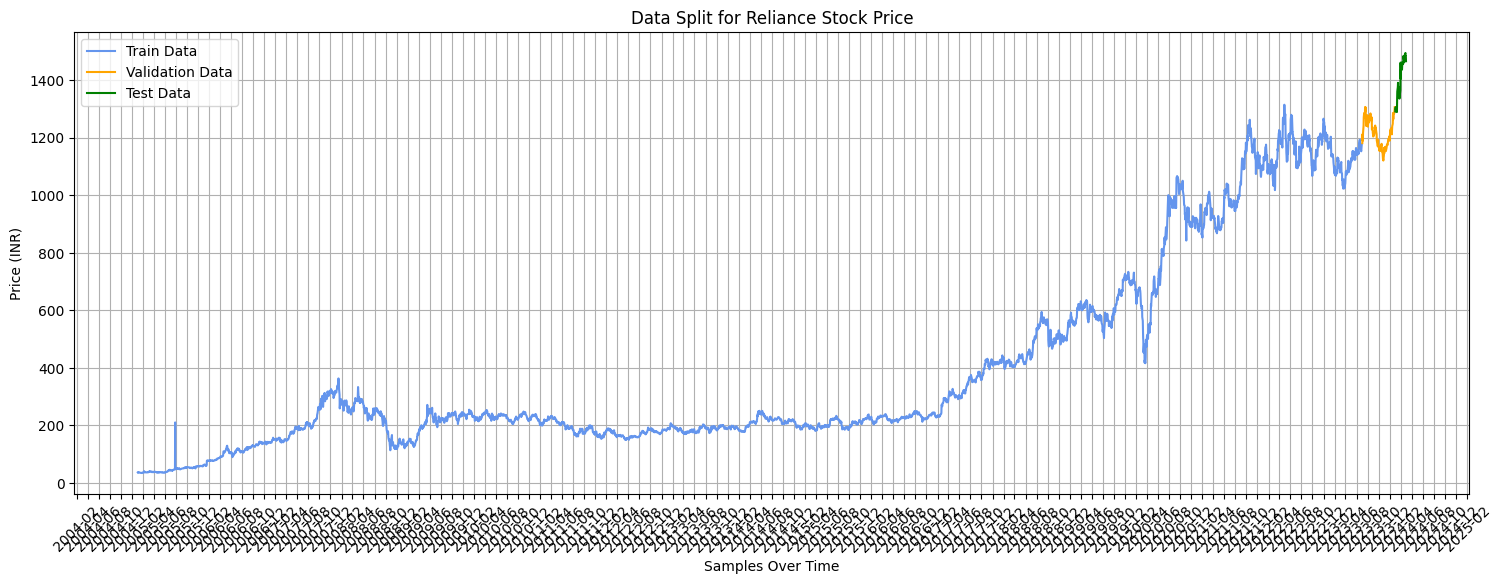

In [150]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Reliance Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (INR)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

In [132]:
data[features].describe()

,Open,High,Low,Close,Volume
count,5048.000000,5048.000000,5048.000000,5048.000000,5.048000e+03
mean,479.020856,484.239860,473.451684,478.657972,2.475990e+07
std,426.069515,429.802461,422.188388,425.871651,2.521744e+07
min,34.754053,35.084321,33.715073,34.513229,0.000000e+00
25%,189.223203,191.437417,186.854998,189.035000,1.192809e+07
50%,235.138465,237.672776,232.347614,234.532623,1.730850e+07
75%,711.608949,717.375944,704.553438,709.514465,2.820666e+07
max,1604.449951,1608.800049,1585.500000,1600.900024,6.322896e+08


In [133]:
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[features])


MinMaxScaler()

In [139]:
scaled_data = scaler.transform(data[features])


In [140]:
scaled_df = pd.DataFrame(scaled_data, columns=features)


In [141]:
import joblib
joblib.dump(scaler, 'reliance_stock_price_scaler.gz')


['reliance_stock_price_scaler.gz']

In [142]:
scaler_model_name = "reliance_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_name + "." + scaler_model_ext)

['reliance_stock_price_scaler.gz']

In [143]:
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [144]:
data_file_name_train = "reliance_train_data"
data_file_name_validate = "reliance_validate_data"
data_file_name_test = "reliance_test_data"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv( data_file_name_test + "." + data_file_ext, index=None)